In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
train = pd.read_csv('/kaggle/input/playground-series-s5e7/train.csv')

train.head()

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0,0.0,No,6.0,4.0,No,15.0,5.0,Extrovert
1,1,1.0,No,7.0,3.0,No,10.0,8.0,Extrovert
2,2,6.0,Yes,1.0,0.0,NaN,3.0,0.0,Introvert
3,3,3.0,No,7.0,3.0,No,11.0,5.0,Extrovert
4,4,1.0,No,4.0,4.0,No,13.0,NaN,Extrovert


# Basic Exploartion

In [4]:
# Information
print("Information : \n")
print(train.info())

# Missing values
print("\nMissing Values : \n")
print(train.isnull().sum())

# Duplicate Entries
print("\nDuplicate Entries : \n")
print(train.duplicated().sum())

Information : 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18524 entries, 0 to 18523
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         18524 non-null  int64  
 1   Time_spent_Alone           17334 non-null  float64
 2   Stage_fear                 16631 non-null  object 
 3   Social_event_attendance    17344 non-null  float64
 4   Going_outside              17058 non-null  float64
 5   Drained_after_socializing  17375 non-null  object 
 6   Friends_circle_size        17470 non-null  float64
 7   Post_frequency             17260 non-null  float64
 8   Personality                18524 non-null  object 
dtypes: float64(5), int64(1), object(3)
memory usage: 1.3+ MB
None

Missing Values : 

id                              0
Time_spent_Alone             1190
Stage_fear                   1893
Social_event_attendance      1180
Going_outside                1466
Dra

# Basic Analytics

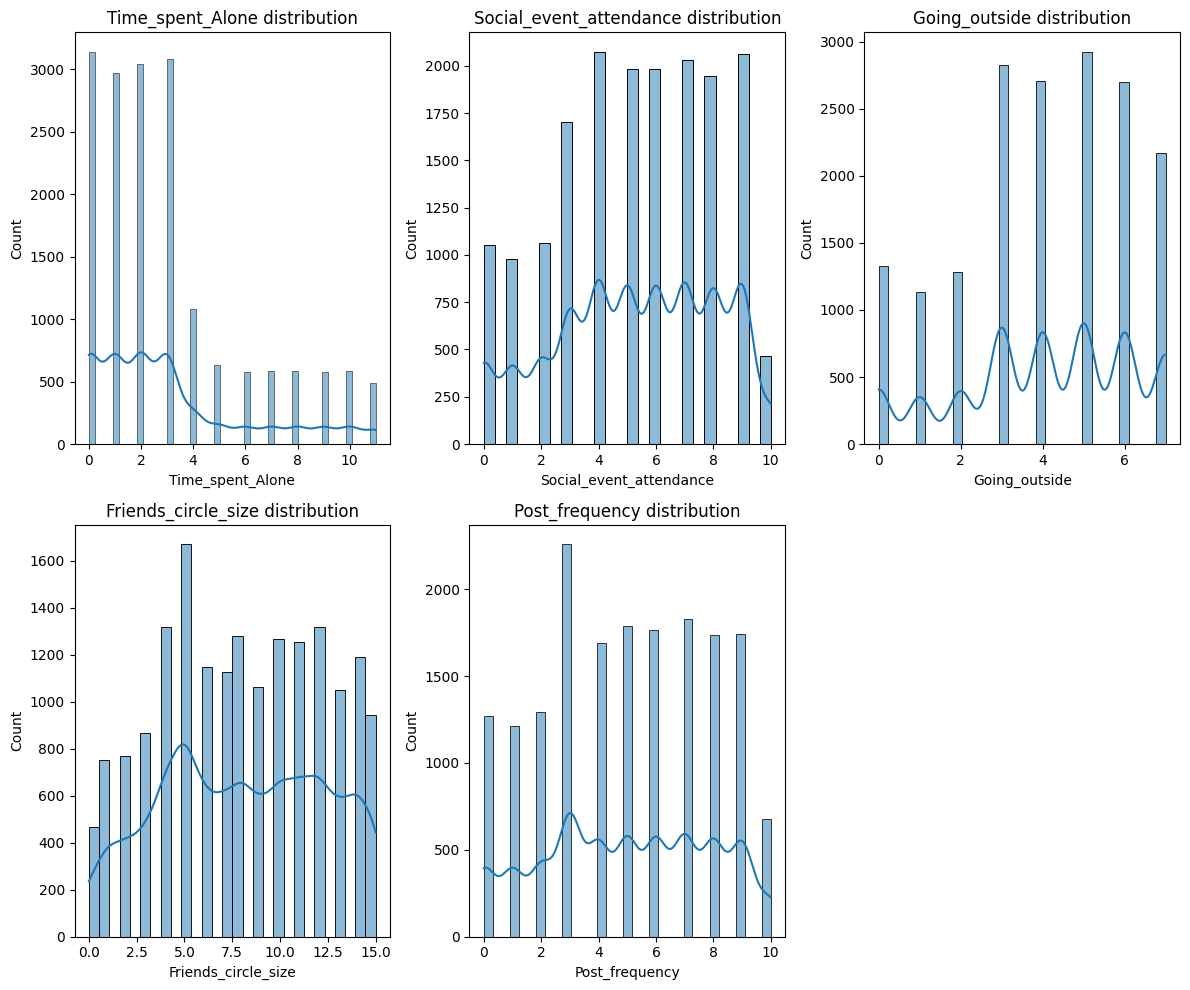

In [5]:
plt.figure(figsize = (12,10))
n = 0 

numeric_columns = ['Time_spent_Alone','Social_event_attendance','Going_outside','Friends_circle_size','Post_frequency']

for col in numeric_columns:
    n = n+1
    plt.subplot(2,3,n)
    sns.histplot(data = train, x = train[col], kde = True)
    plt.title(f"{col} distribution")

plt.tight_layout()
plt.show()


# Data Preprocessing

In [6]:
# Filling Missing values

train[numeric_columns] = train[numeric_columns].fillna(train[numeric_columns].median())


In [7]:
# Train imputation
mean_social_attendance_1 = train['Social_event_attendance'].mean()
train['Stage_fear'] = train['Stage_fear'].fillna(
    train['Social_event_attendance'].apply(lambda x: "Yes" if x > mean_social_attendance_1 else "No")
)


In [8]:
friends_size_mean_1 = train['Friends_circle_size'].mean()
train['Drained_after_socializing'] = train['Drained_after_socializing'].fillna(
    train['Friends_circle_size'].apply(lambda x : "Yes" if x>friends_size_mean_1 else "No")
)


# categorical Encoding

In [9]:
# Categorical columns to numeric
map_values = {"Yes" : 1,
             "No" : 0}

train['Stage_fear'] = train['Stage_fear'].map(map_values)
train['Drained_after_socializing'] = train['Drained_after_socializing'].map(map_values)


personality_map = {"Introvert" : 0,
                  "Extrovert" : 1}

train['Personality'] = train['Personality'].map(personality_map)

In [10]:
train.head()

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0,0.0,0,6.0,4.0,0,15.0,5.0,1
1,1,1.0,0,7.0,3.0,0,10.0,8.0,1
2,2,6.0,1,1.0,0.0,0,3.0,0.0,0
3,3,3.0,0,7.0,3.0,0,11.0,5.0,1
4,4,1.0,0,4.0,4.0,0,13.0,5.0,1


# Numerical Scaling

In [11]:
# Scaling
minmaxscaler = MinMaxScaler()
train[numeric_columns] = minmaxscaler.fit_transform(train[numeric_columns])


In [12]:
train.head()

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0,0.000000,0,0.6,0.571429,0,1.000000,0.5,1
1,1,0.090909,0,0.7,0.428571,0,0.666667,0.8,1
2,2,0.545455,1,0.1,0.000000,0,0.200000,0.0,0
3,3,0.272727,0,0.7,0.428571,0,0.733333,0.5,1
4,4,0.090909,0,0.4,0.571429,0,0.866667,0.5,1


In [13]:
# removing 'id' feature in train dataset and storing 'id' in test.

train = train.drop('id', axis = 1)

# Train and Test split

In [14]:
# splitting the train dataset to training and testing
x = train.drop('Personality', axis = 1)
y = train['Personality']

x_train,x_test,y_train,y_test = train_test_split(
    x,y,
    test_size = 0.2,
    stratify = y,
    random_state = 30
)

# Model Training

In [15]:

from sklearn.model_selection import GridSearchCV


# Define the model
loc_reg = LogisticRegression(random_state=2, max_iter=1000)

# Define the hyperparameter grid to search

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

grid_search = GridSearchCV(estimator=loc_reg, param_grid=param_grid, cv=5, scoring='accuracy')

# Perform the grid search on your training data

grid_search.fit(x_train, y_train)

# Get the best parameters and best score
print("Best hyperparameters found:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)


Best hyperparameters found: {'C': 0.1}
Best cross-validation accuracy: 0.968958950766152


# Model Prediction

In [16]:
# Use the best model to make predictions on the test set
best_model = grid_search.best_estimator_
loc_reg_pred = best_model.predict(x_test)

# Model Evaluation

In [17]:
# Evaluate the final model on the test data
print("Final Logistic Regression Accuracy", accuracy_score(y_test, loc_reg_pred))

Final Logistic Regression Accuracy 0.968421052631579
